<a href="https://colab.research.google.com/github/samcab28/Analisis-Algoritmos/blob/master/IA_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Inteligencia Artificial

Estudiantes:

*   Cabrera Tabash Samir
*   Mesen Alvarado Pablo
*   Urbina Salazar Luis



## Instalacion de dependencias y utilidades

## Recopilacion y descarga de datos


### Metodos de Acceso


In [1]:
# Instalar kagglehub si no está instalado
!pip install kagglehub -q

# Importar y descargar dataset
import kagglehub
import shutil

# Descargar dataset
path = kagglehub.dataset_download("rabieelkharoua/chronic-kidney-disease-dataset-analysis")
print("Ruta de descarga original:", path)

# Moverlo a /content
destino = "/content/chronic_kidney_disease_dataset"

shutil.copytree(path, destino, dirs_exist_ok=True)

print(f"Dataset disponible en: {destino}")


100%|██████████| 473k/473k [00:00<00:00, 39.9MB/s]

Extracting files...
Ruta de descarga original: /root/.cache/kagglehub/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis/versions/1
Dataset disponible en: /content/chronic_kidney_disease_dataset


## Fase preparacion de datos

### Descripcion de datos


In [54]:
import pandas as pd
import numpy as np

# Reemplaza con la ruta a tu CSV
df = pd.read_csv("/content/chronic_kidney_disease_dataset/Chronic_Kidney_Dsease_data.csv")


In [55]:
print("Breve descripción del dataset y comprobación de funcionamiento de pandas.")

df.head()      # Muestra las primeras 5 filas
df.head(10)    # Muestra las primeras 10 filas
df.tail()      # Muestra las últimas 5 filas


Breve descripción del dataset y comprobación de funcionamiento de pandas.


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential
1658,1659,34,1,1,0,0,19.253258,1,11.396510,7.446314,...,9.293499,82.314878,0,0,0,1.754852,0.186400,4.553608,1,Confidential


In [4]:
print("Informacion basica de la data")
print("Registros:", df.shape[0], "Variables:", df.shape[1])
print(df.dtypes)

Informacion basica de la data
Registros: 1659 Variables: 54
PatientID                          int64
Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryKidneyDisease         int64
FamilyHistoryHypertension          int64
FamilyHistoryDiabetes              int64
PreviousAcuteKidneyInjury          int64
UrinaryTractInfections             int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float

In [5]:
print("Busqueda de valores faltantes en el dataset")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_report = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
print(missing_report.sort_values("missing_pct", ascending=False))

Busqueda de valores faltantes en el dataset
                               missing_count  missing_pct
PatientID                                  0          0.0
Age                                        0          0.0
Gender                                     0          0.0
Ethnicity                                  0          0.0
SocioeconomicStatus                        0          0.0
EducationLevel                             0          0.0
BMI                                        0          0.0
Smoking                                    0          0.0
AlcoholConsumption                         0          0.0
PhysicalActivity                           0          0.0
DietQuality                                0          0.0
SleepQuality                               0          0.0
FamilyHistoryKidneyDisease                 0          0.0
FamilyHistoryHypertension                  0          0.0
FamilyHistoryDiabetes                      0          0.0
PreviousAcuteKidneyInjury   

In [6]:
print("Busqueda de valores duplicados, se hace un efoque especial en datos generales y en ID")
dups = df.duplicated().sum()
print("Duplicados exactos:", dups)
# revisar duplicados por PatientID
if "PatientID" in df.columns:
    print("Duplicados por PatientID:", df["PatientID"].duplicated().sum())

Busqueda de valores duplicados, se hace un efoque especial en datos generales y en ID
Duplicados exactos: 0
Duplicados por PatientID: 0


In [7]:
print("Resumen Estadistico Basico de los datos")
desc = df.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T
print(desc[["count","mean","std","min","25%","50%","75%","max"]])

Resumen Estadistico Basico de los datos
                                count        mean         std         min  \
PatientID                      1659.0  830.000000  479.056364    1.000000   
Age                            1659.0   54.441230   20.549757   20.000000   
Gender                         1659.0    0.515371    0.499914    0.000000   
Ethnicity                      1659.0    0.713080    1.000430    0.000000   
SocioeconomicStatus            1659.0    0.977697    0.776686    0.000000   
EducationLevel                 1659.0    1.693189    0.910611    0.000000   
BMI                            1659.0   27.620049    7.288670   15.033888   
Smoking                        1659.0    0.292948    0.455252    0.000000   
AlcoholConsumption             1659.0    9.969831    5.798787    0.021740   
PhysicalActivity               1659.0    5.024247    2.866274    0.001186   
DietQuality                    1659.0    5.028544    2.865777    0.002407   
SleepQuality                   1659.

In [8]:
print("Rangos esperados en los datos")
expected_ranges = {
    "Age": (0,120),
    "BMI": (10,60),
    "SystolicBP": (50,250),
    "DiastolicBP": (30,150),
    "SerumCreatinine": (0.1,10),
    "GFR": (0,200),
    "HbA1c": (3.0,15.0),
    "FastingBloodSugar": (30,400),
    "ProteinInUrine": (0,100),
    "ACR": (0,1000),
}
out_of_range = {}
for col,(low,high) in expected_ranges.items():
    if col in df.columns:
        vio = df[(df[col] < low) | (df[col] > high)]
        out_of_range[col] = len(vio)
print("Valores fuera de rango por variable:", out_of_range)

Rangos esperados en los datos
Valores fuera de rango por variable: {'Age': 0, 'BMI': 0, 'SystolicBP': 0, 'DiastolicBP': 0, 'SerumCreatinine': 0, 'GFR': 0, 'HbA1c': 0, 'FastingBloodSugar': 0, 'ProteinInUrine': 0, 'ACR': 0}


In [9]:
print("Deteccion de outliers en la data")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
iqr_outliers = {}
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    n_out = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    iqr_outliers[col] = n_out
# Mostrar variables con mayor número de outliers
iqr_series = pd.Series(iqr_outliers).sort_values(ascending=False)
print("Outliers (IQR) por variable (top 20):")
print(iqr_series.head(20))

Deteccion de outliers en la data
Outliers (IQR) por variable (top 20):
UrinaryTractInfections           349
AntidiabeticMedications          336
Edema                            335
WaterQuality                     327
FamilyHistoryKidneyDisease       234
PreviousAcuteKidneyInjury        175
OccupationalExposureChemicals    171
Ethnicity                        162
Diagnosis                        135
HeavyMetalsExposure               73
Gender                             0
SocioeconomicStatus                0
BMI                                0
SleepQuality                       0
DietQuality                        0
Age                                0
EducationLevel                     0
AlcoholConsumption                 0
PhysicalActivity                   0
Smoking                            0
dtype: int64


In [10]:
print("correlacion entre variables clinicas")
clinicals = ["SerumCreatinine","GFR","BUNLevels","ProteinInUrine","ACR","HbA1c","HemoglobinLevels","SystolicBP"]
present = [c for c in clinicals if c in df.columns]
corr = df[present].corr()
print("Matriz de correlación (muestra):")
print(corr)

correlacion entre variables clinicas
Matriz de correlación (muestra):
                  SerumCreatinine       GFR  BUNLevels  ProteinInUrine  \
SerumCreatinine          1.000000 -0.003434   0.022555       -0.037101   
GFR                     -0.003434  1.000000  -0.036221       -0.009442   
BUNLevels                0.022555 -0.036221   1.000000       -0.000365   
ProteinInUrine          -0.037101 -0.009442  -0.000365        1.000000   
ACR                     -0.001899 -0.008342   0.011626       -0.014503   
HbA1c                   -0.035630 -0.038573   0.010360       -0.019301   
HemoglobinLevels        -0.003282 -0.019169   0.012472       -0.001390   
SystolicBP              -0.018829  0.009462   0.021084       -0.012435   

                       ACR     HbA1c  HemoglobinLevels  SystolicBP  
SerumCreatinine  -0.001899 -0.035630         -0.003282   -0.018829  
GFR              -0.008342 -0.038573         -0.019169    0.009462  
BUNLevels         0.011626  0.010360          0.012472  

### Limpieza datos

In [96]:
df_clean["Diagnosis"].value_counts()


,count
Diagnosis,
1,1524
0,135


In [97]:
from sklearn.utils import resample

df_majority = df_clean[df_clean["Diagnosis"] == 1]
df_minority = df_clean[df_clean["Diagnosis"] == 0]

# Elegimos 3:1 → 405 positivos
df_majority_down = resample(
    df_majority,
    replace=False,
    n_samples=405,
    random_state=42
)

df_balanced = pd.concat([df_majority_down, df_minority])
df_balanced["Diagnosis"].value_counts()


,count
Diagnosis,
1,405
0,135


In [58]:
# ==== PREPROCESAMIENTO GENERAL PARA AMBOS MODELOS ====

import pandas as pd
import numpy as np

df_clean = df.copy()

# 1. Eliminar variables no predictivas
df_clean = df_clean.drop(columns=["PatientID", "DoctorInCharge"])

# 2. Codificación one-hot SOLO en variables categóricas discretas
categorical_vars = ["Ethnicity", "SocioeconomicStatus", "EducationLevel"]
df_clean = pd.get_dummies(df_clean, columns=categorical_vars, drop_first=True)

# 3. Transformación logarítmica SOLO en variables muy sesgadas
log_vars = ["SerumCreatinine", "BUNLevels", "ACR", "CholesterolTriglycerides"]
for var in log_vars:
    df_clean[f"log_{var}"] = np.log1p(df_clean[var])

# 4. Imputación muy suave por si hubiera NaNs
df_clean = df_clean.fillna(df_clean.median())

### Division del dataset

Se divide el dataset en fases de entrenamiento, testing y validacion

In [72]:
# ==== PREPROCESAMIENTO GENERAL CON BALANCEO ====

import pandas as pd
import numpy as np
from sklearn.utils import resample

# ====== 1. Copia del dataset ======
df_clean = df.copy()

# ====== 2. Eliminar variables no predictivas ======
cols_to_drop = ["PatientID", "DoctorInCharge"]
df_clean = df_clean.drop(columns=cols_to_drop, errors="ignore")

# ====== 3. Balanceo del dataset (Submuestreo de clase 1) ======
# Conteo de clases
df_majority = df_clean[df_clean["Diagnosis"] == 1]   # positivos
df_minority = df_clean[df_clean["Diagnosis"] == 0]   # negativos

# Submuestrear positivos → 405
df_majority_down = resample(
    df_majority,
    replace=False,
    n_samples=405,
    random_state=42
)

# Crear dataset balanceado
df_balanced = pd.concat([df_majority_down, df_minority]).sample(frac=1, random_state=42)

print("Nuevo conteo de clases:")
print(df_balanced["Diagnosis"].value_counts())

# ====== 4. Codificación one-hot ======
categorical_vars = ["Ethnicity", "SocioeconomicStatus", "EducationLevel"]
df_balanced = pd.get_dummies(df_balanced, columns=categorical_vars, drop_first=True)

# ====== 5. Transformación logarítmica en variables sesgadas ======
log_vars = ["SerumCreatinine", "BUNLevels", "ACR", "CholesterolTriglycerides"]

for var in log_vars:
    df_balanced[f"log_{var}"] = np.log1p(df_balanced[var])

# ====== 6. Imputación suave ======
df_balanced = df_balanced.fillna(df_balanced.median())

# ====== 7. Dataset final ======
print("\nShape final del dataset balanceado:", df_balanced.shape)


Nuevo conteo de clases:
Diagnosis
1    405
0    135
Name: count, dtype: int64

Shape final del dataset balanceado: (540, 61)


In [73]:
from sklearn.model_selection import train_test_split

# =======================
# 1. Separar X y y
# =======================
X = df_balanced.drop(columns=["Diagnosis"])
y = df_balanced["Diagnosis"]

# =======================
# 2. Train/Test Split (80/20)
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# =======================
# 3. Confirmar shapes
# =======================
print("Shapes del split:")
print(f"X_train: {X_train.shape} → {X_train.shape[0]} muestras, {X_train.shape[1]} features")
print(f"X_test:  {X_test.shape}  → {X_test.shape[0]} muestras, {X_test.shape[1]} features")
print(f"y_train: {y_train.shape} → {y_train.shape[0]} etiquetas")
print(f"y_test:  {y_test.shape}  → {y_test.shape[0]} etiquetas")

# =======================
# 4. Confirmar distribución
# =======================
print("\nDistribución en y_train:")
print(y_train.value_counts())

print("\nDistribución en y_test:")
print(y_test.value_counts())


Shapes del split:
X_train: (432, 60) → 432 muestras, 60 features
X_test:  (108, 60)  → 108 muestras, 60 features
y_train: (432,) → 432 etiquetas
y_test:  (108,)  → 108 etiquetas

Distribución en y_train:
Diagnosis
1    324
0    108
Name: count, dtype: int64

Distribución en y_test:
Diagnosis
1    81
0    27
Name: count, dtype: int64


### Inspeccion de Datos Seleccionados

In [16]:
# Revisar primeras filas del dataset procesado
df_clean.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,...,Ethnicity_3,SocioeconomicStatus_1,SocioeconomicStatus_2,EducationLevel_1,EducationLevel_2,EducationLevel_3,log_SerumCreatinine,log_BUNLevels,log_ACR,log_CholesterolTriglycerides
0,71,0,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,...,False,False,False,False,True,False,1.785495,3.281135,4.827108,5.361739
1,34,0,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,...,False,True,False,False,False,True,1.424745,3.476248,4.494675,5.546939
2,80,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,...,False,False,False,True,False,False,1.547187,3.707165,3.098780,5.533004
3,40,0,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,...,False,False,False,True,False,False,1.352858,3.134666,4.826550,5.974670
4,43,0,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,...,False,True,False,False,True,False,1.602389,2.581456,5.224951,5.917613


In [17]:
# Información general del dataset final
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1659 non-null   int64  
 1   Gender                         1659 non-null   int64  
 2   BMI                            1659 non-null   float64
 3   Smoking                        1659 non-null   int64  
 4   AlcoholConsumption             1659 non-null   float64
 5   PhysicalActivity               1659 non-null   float64
 6   DietQuality                    1659 non-null   float64
 7   SleepQuality                   1659 non-null   float64
 8   FamilyHistoryKidneyDisease     1659 non-null   int64  
 9   FamilyHistoryHypertension      1659 non-null   int64  
 10  FamilyHistoryDiabetes          1659 non-null   int64  
 11  PreviousAcuteKidneyInjury      1659 non-null   int64  
 12  UrinaryTractInfections         1659 non-null   i

In [20]:
print("Resumen Estadistico Basico de los datos")
desc = df_clean.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T
print(desc[["count","mean","std","min","25%","50%","75%","max"]])

Resumen Estadistico Basico de los datos
                                count        mean         std         min  \
Age                            1659.0   54.441230   20.549757   20.000000   
Gender                         1659.0    0.515371    0.499914    0.000000   
BMI                            1659.0   27.620049    7.288670   15.033888   
Smoking                        1659.0    0.292948    0.455252    0.000000   
AlcoholConsumption             1659.0    9.969831    5.798787    0.021740   
PhysicalActivity               1659.0    5.024247    2.866274    0.001186   
DietQuality                    1659.0    5.028544    2.865777    0.002407   
SleepQuality                   1659.0    6.942324    1.704159    4.001053   
FamilyHistoryKidneyDisease     1659.0    0.141049    0.348177    0.000000   
FamilyHistoryHypertension      1659.0    0.301386    0.458998    0.000000   
FamilyHistoryDiabetes          1659.0    0.257384    0.437325    0.000000   
PreviousAcuteKidneyInjury      1659.

In [18]:
# Estadísticas básicas del dataset post-preprocesamiento
df_clean.describe()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,log_SerumCreatinine,log_BUNLevels,log_ACR,log_CholesterolTriglycerides
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,54.441230,0.515371,27.620049,0.292948,9.969831,5.024247,5.028544,6.942324,0.141049,0.301386,...,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626,1.253073,3.225032,4.712477,5.294155
std,20.549757,0.499914,7.288670,0.455252,5.798787,2.866274,2.865777,1.704159,0.348177,0.458998,...,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492,0.386363,0.543447,0.976390,0.539302
min,20.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,4.001053,0.000000,0.000000,...,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000,0.406663,1.791801,0.164181,3.937060
25%,36.000000,0.000000,21.471449,0.000000,5.051156,2.555038,2.558443,5.487083,0.000000,0.000000,...,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000,0.949050,2.856370,4.353940,4.950429
50%,54.000000,1.000000,27.652077,0.000000,9.951503,5.072395,4.989810,6.933255,0.000000,0.000000,...,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000,1.316946,3.369975,5.018572,5.427002
75%,72.000000,1.000000,34.015849,1.000000,14.967100,7.460563,7.428290,8.346298,0.000000,1.000000,...,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000,1.587158,3.666823,5.420787,5.739094
max,90.000000,1.000000,39.993532,1.000000,19.992713,9.998167,9.998927,9.984197,1.000000,1.000000,...,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000,1.791532,3.931640,5.705714,5.993760


## Balanceo del dataset

In [80]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

clases = np.unique(y_train)
pesos = compute_class_weight(class_weight='balanced', classes=clases, y=y_train)
pesos_dict = {clase: peso for clase, peso in zip(clases, pesos)}

print("Pesos asignados:", pesos_dict)

Pesos asignados: {np.int64(0): np.float64(2.0), np.int64(1): np.float64(0.6666666666666666)}


## Fase Modelado

### Algoritmo 1

In [76]:
# ============================
# 1. Features: Indicadores renales directos
# ============================

caracteristicas_1 = [
    "GFR", "SerumCreatinine", "ProteinInUrine", "ACR",
    "BUNLevels", "Age", "SystolicBP", "DiastolicBP"
]

# ⚠️ Ahora usamos df_balanced, no df
X_f1 = df_balanced[caracteristicas_1]
y_f1 = df_balanced["Diagnosis"]

from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_f1, y_f1,
    test_size=0.2,
    random_state=42,
    stratify=y_f1
)

# ============================
# Revisar shapes y distribución
# ============================

print("Shapes:")
print("X_train:", X_train_1.shape)
print("X_test :", X_test_1.shape)
print("y_train:", y_train_1.shape)
print("y_test :", y_test_1.shape)

print("\nDistribución y_train:")
print(y_train_1.value_counts())

print("\nDistribución y_test:")
print(y_test_1.value_counts())

Shapes:
X_train: (432, 8)
X_test : (108, 8)
y_train: (432,)
y_test : (108,)

Distribución y_train:
Diagnosis
1    324
0    108
Name: count, dtype: int64

Distribución y_test:
Diagnosis
1    81
0    27
Name: count, dtype: int64


In [87]:
from sklearn.tree import DecisionTreeClassifier

# Modelo sin class_weight porque ya está balanceado
model_f1 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    class_weight=None,        # ya no se usa porque SMOTE balanceó
    random_state=42
)

# Ajustar al nuevo split balanceado
model_f1.fit(X_train_1, y_train_1)


DecisionTreeClassifier(random_state=42)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_1 = model_f1.predict(X_test_1)

print("\nMatriz de confusión:")
print(confusion_matrix(y_test_1, y_pred_1))

print("\nReporte de clasificación:")
print(classification_report(y_test_1, y_pred_1))



Matriz de confusión:
[[11 16]
 [16 65]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.41      0.41      0.41        27
           1       0.80      0.80      0.80        81

    accuracy                           0.70       108
   macro avg       0.60      0.60      0.60       108
weighted avg       0.70      0.70      0.70       108



#### Entrenamiento

#### Testing


In [26]:
!pip install imbalanced-learn

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [90]:
# ============================
# 1. Features: Indicadores renales directos
# ============================

caracteristicas_1 = [
    "GFR", "SerumCreatinine", "ProteinInUrine", "ACR",
    "BUNLevels", "Age", "SystolicBP", "DiastolicBP"
]

X = df_balanced[caracteristicas_1]
y = df_balanced["Diagnosis"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Shapes después del split balanceado:")
print(f"X_train: {X_train.shape} → {X_train.shape[0]} muestras, {X_train.shape[1]} features")
print(f"X_test:  {X_test.shape}  → {X_test.shape[0]} muestras, {X_test.shape[1]} features")
print(f"y_train: {y_train.shape} → {y_train.shape[0]} etiquetas")
print(f"y_test:  {y_test.shape}  → {y_test.shape[0]} etiquetas")

print("\nDistribución en y_train:")
print(y_train.value_counts())

print("\nDistribución en y_test:")
print(y_test.value_counts())


Shapes después del split balanceado:
X_train: (432, 8) → 432 muestras, 8 features
X_test:  (108, 8)  → 108 muestras, 8 features
y_train: (432,) → 432 etiquetas
y_test:  (108,)  → 108 etiquetas

Distribución en y_train:
Diagnosis
1    324
0    108
Name: count, dtype: int64

Distribución en y_test:
Diagnosis
1    81
0    27
Name: count, dtype: int64


In [91]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,            # Controla profundidad → menos overfitting
    min_samples_split=10,   # Evita splits con muy pocos datos
    min_samples_leaf=5,     # Hojas más robustas
    random_state=42
)

modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [93]:
y_pred = modelo.predict(X_test)

print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[13 14]
 [11 70]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.54      0.48      0.51        27
           1       0.83      0.86      0.85        81

    accuracy                           0.77       108
   macro avg       0.69      0.67      0.68       108
weighted avg       0.76      0.77      0.76       108



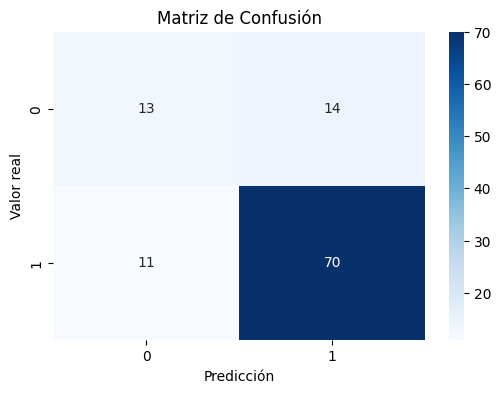

In [94]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

### Algoritmo 2

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# RANDOM FOREST
rf_model = RandomForestClassifier(
    n_estimators=300,           # número de árboles
    max_depth=None,            # deja que cada árbol crezca completo
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=pesos_dict,
    random_state=42,
    n_jobs=-1                  # usa todos los núcleos del CPU
)

rf_model.fit(X_train_1, y_train_1)
print("Modelo Random Forest entrenado.")


Modelo Random Forest entrenado.


In [46]:
y_pred_rf = rf_model.predict(X_test_1)

print("\n📌 Matriz de Confusión:")
print(confusion_matrix(y_test_1, y_pred_rf))

print("\n📌 Reporte de Clasificación:")
print(classification_report(y_test_1, y_pred_rf))



📌 Matriz de Confusión:
[[  2  25]
 [  1 304]]

📌 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.67      0.07      0.13        27
           1       0.92      1.00      0.96       305

    accuracy                           0.92       332
   macro avg       0.80      0.54      0.55       332
weighted avg       0.90      0.92      0.89       332




📌 Importancia de Features:
           Feature  Importance
1  SerumCreatinine    0.232165
0              GFR    0.173313
2   ProteinInUrine    0.142776
4        BUNLevels    0.120669
6       SystolicBP    0.097264
3              ACR    0.086798
5              Age    0.076221
7      DiastolicBP    0.070794


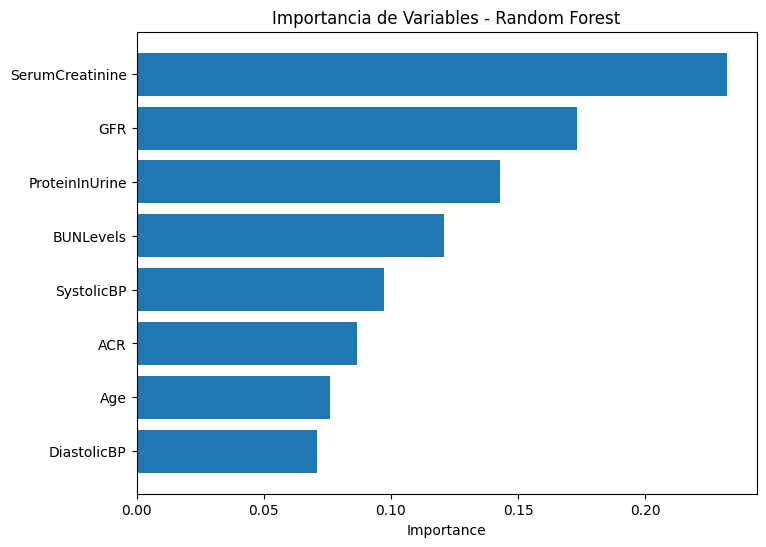

In [47]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X_train_1.columns

df_importances = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\n📌 Importancia de Features:")
print(df_importances)

# Gráfico opcional
plt.figure(figsize=(8,6))
plt.barh(df_importances["Feature"], df_importances["Importance"])
plt.gca().invert_yaxis()
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importance")
plt.show()


### Algoritmo 3

In [95]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# ============================
# LOAD YOUR DATA
# ============================
# X = features (numpy array o dataframe)
# y = labels

# Ejemplo:
# X = df.drop("diagnosis", axis=1).values
# y = df["diagnosis"].values

# ============================
# CONFIGURACIÓN DEL MODELO
# ============================
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

# ============================
# VALIDACIÓN CRUZADA
# ============================
k = 5  # puedes usar 5 o 10

kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

print(f"\n🔍 Cross Validation ({k}-Fold)")
print(f"Scores por fold: {cv_scores}")
print(f"Accuracy promedio: {np.mean(cv_scores):.4f}")
print(f"Desviación estándar: {np.std(cv_scores):.4f}")

# ============================
# TRAIN FINAL MODEL
# ============================
rf.fit(X, y)
print("\nModelo entrenado con todos los datos ✔️")

# ============================
# TEST (SI TIENES X_test, y_test)
# ============================
# preds = rf.predict(X_test)
# print("\nTest Accuracy:", accuracy_score(y_test, preds))
# print(classification_report(y_test, preds))



🔍 Cross Validation (5-Fold)
Scores por fold: [0.83333333 0.76851852 0.84259259 0.84259259 0.82407407]
Accuracy promedio: 0.8222
Desviación estándar: 0.0277

Modelo entrenado con todos los datos ✔️


### Algoritmo 4

# Pruebas 2


In [48]:
# Instalar kagglehub si no está instalado
!pip install kagglehub -q

# Importar y descargar dataset
import kagglehub
import shutil

# Descargar dataset
path = kagglehub.dataset_download("mansoordaku/ckdisease")
print("Ruta de descarga original:", path)

# Moverlo a /content
destino = "/content/ckd"

shutil.copytree(path, destino, dirs_exist_ok=True)

print(f"Dataset disponible en: {destino}")

100%|██████████| 9.51k/9.51k [00:00<00:00, 8.92MB/s]

Extracting files...
Ruta de descarga original: /root/.cache/kagglehub/datasets/mansoordaku/ckdisease/versions/1
Dataset disponible en: /content/ckd


In [50]:
import pandas as pd
import numpy as np

# Reemplaza con la ruta a tu CSV
df = pd.read_csv("/content/ckd/kidney_disease.csv")

In [51]:
print("Informacion basica de la data")
print("Registros:", df.shape[0], "Variables:", df.shape[1])
print(df.dtypes)

Informacion basica de la data
Registros: 400 Variables: 26
id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [52]:
print("Busqueda de valores faltantes en el dataset")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_report = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
print(missing_report.sort_values("missing_pct", ascending=False))

Busqueda de valores faltantes en el dataset
                missing_count  missing_pct
rbc                       152        38.00
rc                        130        32.50
wc                        105        26.25
pot                        88        22.00
sod                        87        21.75
pcv                        70        17.50
pc                         65        16.25
hemo                       52        13.00
su                         49        12.25
sg                         47        11.75
al                         46        11.50
bgr                        44        11.00
bu                         19         4.75
sc                         17         4.25
bp                         12         3.00
age                         9         2.25
pcc                         4         1.00
ba                          4         1.00
dm                          2         0.50
htn                         2         0.50
cad                         2         0.50
appet     

In [53]:
print("Resumen Estadistico Basico de los datos")
desc = df.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T
print(desc[["count","mean","std","min","25%","50%","75%","max"]])

Resumen Estadistico Basico de los datos
      count        mean         std     min     25%     50%     75%      max
id    400.0  199.500000  115.614301   0.000   99.75  199.50  299.25  399.000
age   391.0   51.483376   17.169714   2.000   42.00   55.00   64.50   90.000
bp    388.0   76.469072   13.683637  50.000   70.00   80.00   80.00  180.000
sg    353.0    1.017408    0.005717   1.005    1.01    1.02    1.02    1.025
al    354.0    1.016949    1.352679   0.000    0.00    0.00    2.00    5.000
su    351.0    0.450142    1.099191   0.000    0.00    0.00    0.00    5.000
bgr   356.0  148.036517   79.281714  22.000   99.00  121.00  163.00  490.000
bu    381.0   57.425722   50.503006   1.500   27.00   42.00   66.00  391.000
sc    383.0    3.072454    5.741126   0.400    0.90    1.30    2.80   76.000
sod   313.0  137.528754   10.408752   4.500  135.00  138.00  142.00  163.000
pot   312.0    4.627244    3.193904   2.500    3.80    4.40    4.90   47.000
hemo  348.0   12.526437    2.912587 